# Gọi thư viện cần thiết

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use(['ggplot'])

# Tạo dữ liệu

<h5> Giả sử ta khởi tạo dữ liệu với:
\begin{equation} 
    \theta_0= 3 \end{equation}
\begin{equation} 
    \theta_1= 7 \end{equation} 

Hay phương trình: y = 3 + 7*X

In [23]:
#Tạo tham số nhiễu
bias_noise = np.random.randn(100,1)
#Tạo giá trị X ngẫu nhiên
X = np.random.rand(100,1)
#Tạo giá trị y tương ứng
y = 3 + 7*X + bias_noise

<h5> Biểu diễn dữ liệu

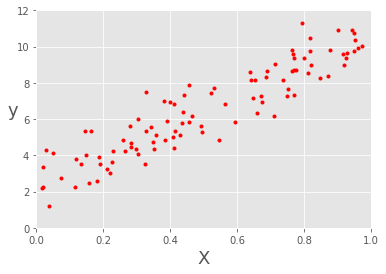

In [25]:
plt.plot(X,y,'r.')
plt.xlabel("X", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
_ = plt.axis([0,1 ,0,12])

# Gradient Descent

## Cost Function & Gradients



<b>Cost</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [26]:

def  func_cost(theta,X,y):
    '''
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    '''
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions-y)) #MSE
    return cost


In [27]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = func_cost(theta,X,y)
        
    return theta, cost_history, theta_history
        
    
    

<h5> Chọn giá trị theta ngẫu nhiên với phân phối Gaussian
    
<h5> Bắt đầu với 1000 iterations and learning rate 0.01

In [28]:
learning_rate = 0.01
n_iter = 1000
theta = np.random.randn(2,1)

print('Giá trị khởi tạo theta ban đầu\n', theta)

#Mở rộng ma trận X thêm 1 trường tham số
X_b = np.c_[np.ones((len(X),1)),X]

#Kiểm tra kết quả với hàm gradient_descent
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,learning_rate,n_iter)

print('\nResult:')
print('Theta0:          {:0.3f} \nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Giá trị khởi tạo theta ban đầu
 [[-0.48208147]
 [ 0.16747981]]

Result:
Theta0:          3.833 
Theta1:          5.542
Final cost/MSE:  0.772


<h5> Vẽ biểu đồ giá trị mất mát qua mỗi lần lặp.
<h5> Chắc chắn rồi! Nó phải tiến về 0 mới hợp lý nhé

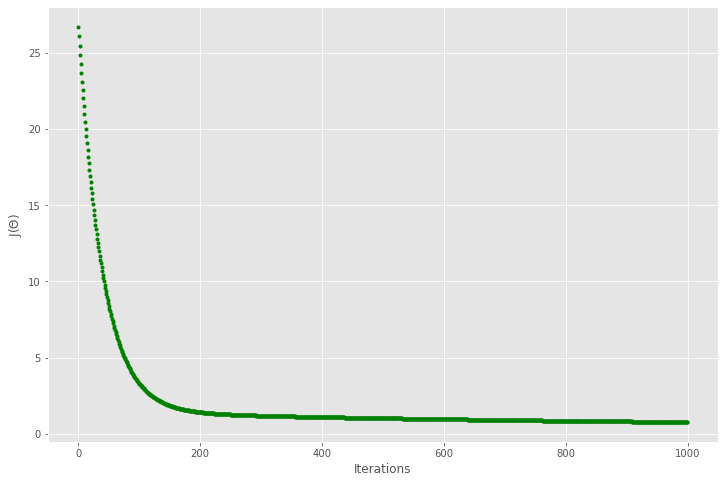

In [30]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J($\Theta$)')
ax.set_xlabel('Iterations')
_= ax.plot(range(n_iter),cost_history,'g.')

### Nhận xét

Nếu bạn quan sát kĩ sẽ thấy ban đầu hàm loss giảm rất nhanh nhưng sau đó thì giảm ít lại.
    
Nhưng chắc rằng, bạn sẽ chưa hình dung ra sự khác biệt của thuật toán GD ứng với mỗi learning_rate và iterations.
    
Cùng bắt tay làm điều đó nào!

### Biểu diễn quá trình làm việc của Gradient Descent

In [31]:

def plot_GD(n_iter,learning_rate,ax,ax1=None):
     """
     n_iter 
     learning_rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot
     """
        
     _ = ax.plot(X,y,'r.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
        
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'g-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')  

<h5> Ứng với mỗi learning_rate và iterations khác nhau. Hãy xem thử sự thay đổi của hàm loss và kết quả của thuật toán GD nhé!

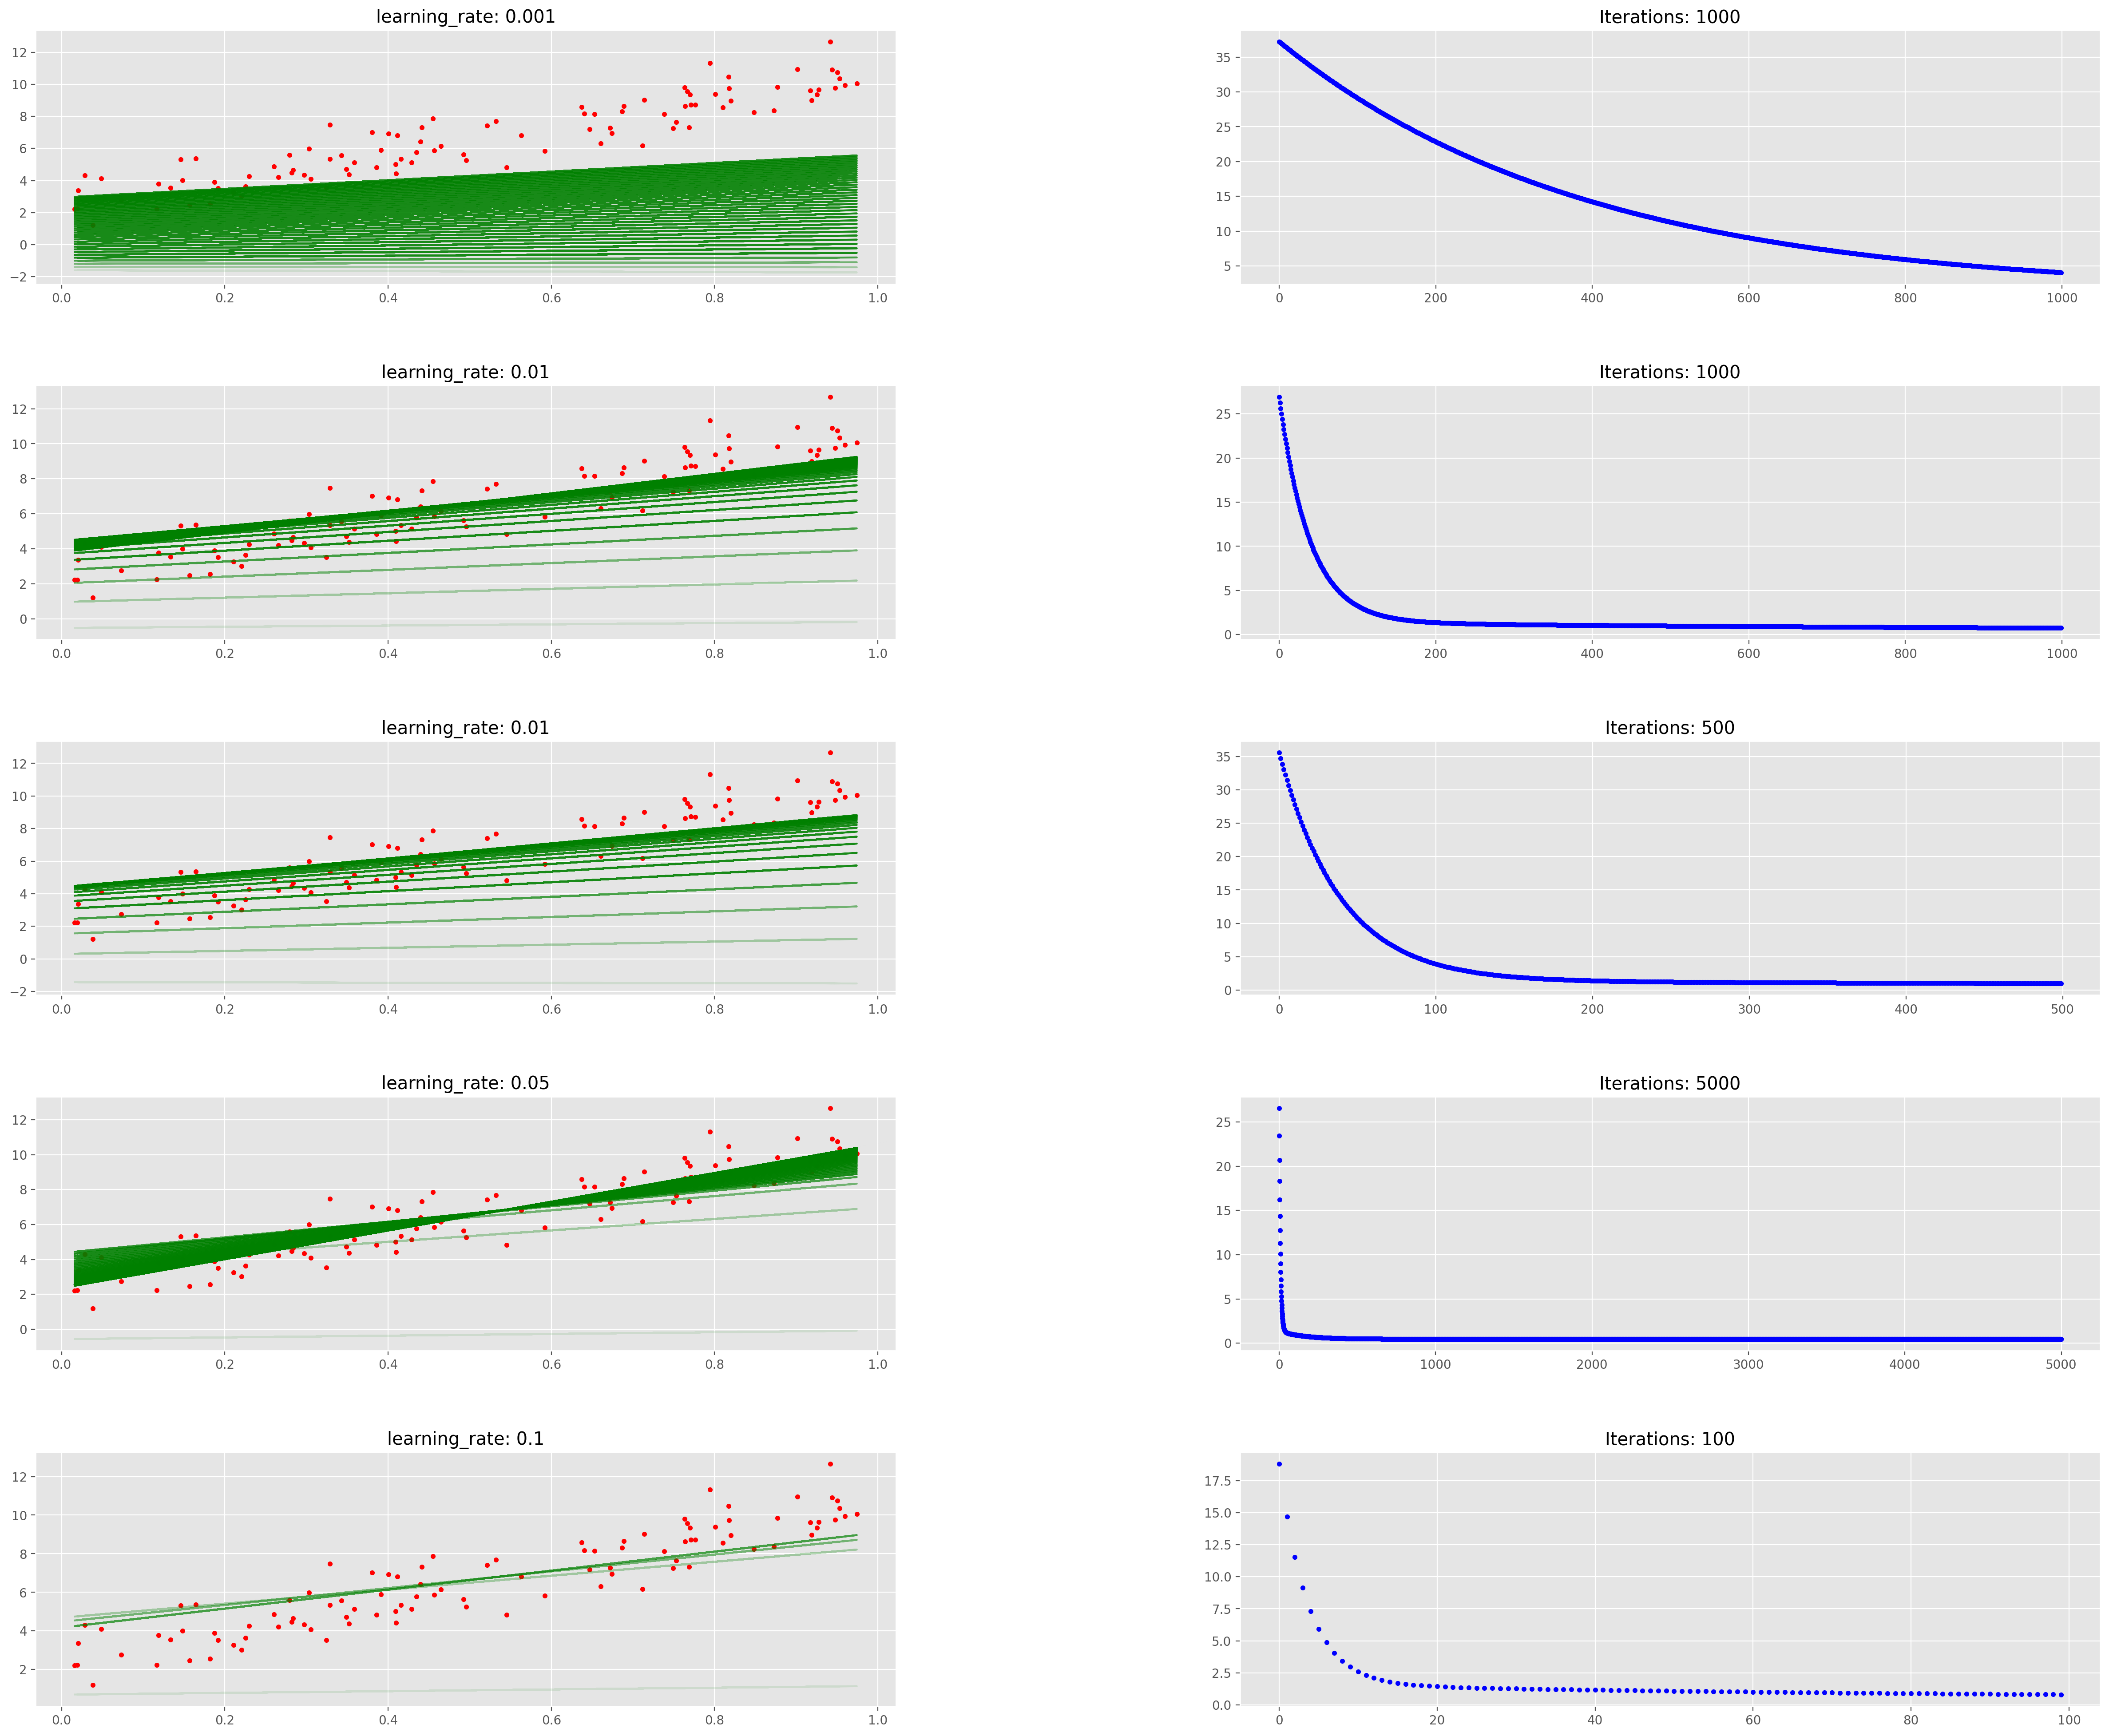

In [32]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

#Xây dựng các cặp iterations-learning_rate
it_lr =[(1000,0.001), (1000, 0.01) ,(500,0.01), (5000,0.05), (100,0.1)]

count =0
for n_iter, lr in it_lr:
    count += 1
    ax = fig.add_subplot(5, 2, count)
    
    count += 1
    ax1 = fig.add_subplot(5,2,count)
    
    ax.set_title("learning_rate: {}".format(lr))
    ax1.set_title("Iterations: {}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)
    

# Stochastic Gradient Descent

In [33]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += func_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [34]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.473,
Theta1:          6.220
Final cost/MSE:  72.842


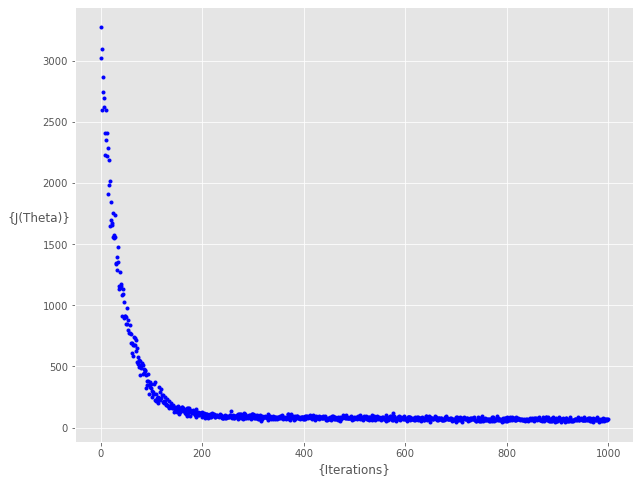

In [35]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

# Mini Batch Gradient Descent

In [36]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += func_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [37]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.297,
Theta1:          6.521
Final cost/MSE:  2.992


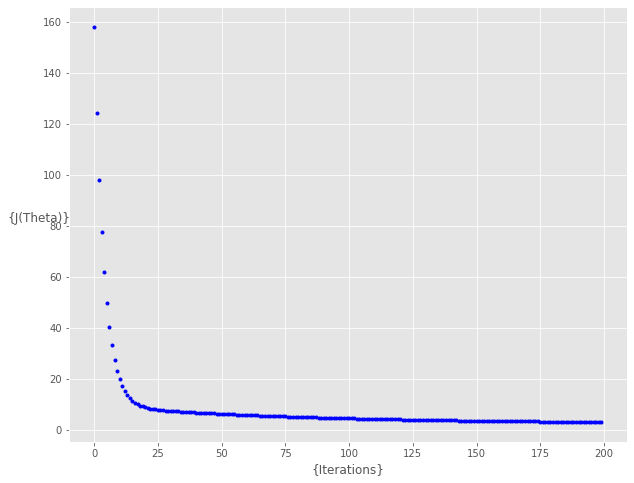

In [38]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')